this jupyer notebook uses Python 3.10 as its kernel !

# SVM

| Data | Xi1 | Xi2 | Yi  | αi    |
| ---- | --- | --- | --- | ----- |
| X1   | 4   | 2.9 | 1   | 0.414 |
| X2   | 4   | 4   | 1   | 0     |
| X3   | 1   | 2.5 | -1  | 0     |
| X4   | 2.5 | 1   | -1  | 0.018 |
| X5   | 4.9 | 4.5 | 1   | 0     |
| X6   | 1.9 | 1.9 | -1  | 0     |
| X7   | 3.5 | 4   | 1   | 0.018 |
| X8   | 0.5 | 1.5 | -1  | 0     |
| X9   | 2   | 2.1 | -1  | 0.414 |
| X10  | 4.5 | 2.5 | 1   | 0     |


[25 pts] Support Vector Machines: Given 10 points in Table 1, along with their classes and their Lagrangian multipliers (αi), answer the following questions. The solution is already provided in the lecture slide.

[10 pts] Using NumPy, implement a simple SVM that returns the coefficients of the hyperplane. The simple SVM does not require an SDG approach. The simple SVM has three arguments, X, Y, and α, as simple_SVM(X,Y,alpha). What is the equation of h(x)? Draw the hyperplane with the 10 points.

[10 pts] Write a method that calculates the distance of each point from the hyperplane and returns a binary result if a point is within the margin. If a point is in the margin, the binary result is 1 and 0 otherwise. What is the maximized margin? Return the result in the table format as shown.

| Data | Distance | In Margin? |
| ---- | -------- | ---------- |
| x*1  | D*1      | {0,1}      |
| ⋮    | ⋮        | ⋮          |
| x*10 | D_10     | {0,1}      |

[5 pts] Classify the point z = (3, 3)T using h(x) from above.


We are given a set of 10 points along with their classes and Lagrangian multipliers.
We can solve for the coefficients of the hyperplane using the following algorithm for SVM:
For calculating the weight vector, we have:

w = Σ(αi * yi * xi)

And for calculating the bias, we have:

b = yi - w^T xi

Once we have calculated the weight vector and bias, we can use them to classify new data points using the hyperplane function:

h(x) = w^T x + b

where x is the new data point.

To calculate the distance of each point from the hyperplane, we use the formula:

distance = |h(x)| / ||w||

where ||w|| is the norm of the weight vector.

Finally, to calculate the margin, we need to find the distance between the hyperplane and the closest data point from either class. This can be done by iterating over all the data points and finding the minimum distance for each class.

In [1]:
# imports for SVM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# i have used around to around the decimal calculations to 2 decimal places
class SVM:
    def __init__(self):
        self.X = None
        self.y = None
        self.alpha = None
        self.b = None
        self.w = None
        self.precision = 3
        self.marginError = 10**(-self.precision)

    def fit(self, X, y, alpha):
        self.X = X
        self.y = y
        self.alpha = alpha
        # calculate weights
        self.w = np.sum(alpha * y * X.T, axis=1)
        # get support vectors
        self.idx = alpha > 0.0
        self.supportVectors = X[self.idx]
        self.b = np.around(np.mean(y[self.idx] - np.dot(X[self.idx], self.w)),self.precision)
        # Compute the maximum margin
        self.margin = np.around(1 / np.linalg.norm(self.w),self.precision)

    def predict(self, X):
        # Compute the SVM output for input data
        distances = np.around(
           (np.dot(X, self.w) + self.b) / np.linalg.norm(self.w),self.precision
        )
        return np.where(
            distances <= self.margin,
            np.sign(np.dot(X, self.w) + self.b),
            -1 * np.sign(np.dot(X, self.w) + self.b),
        )

    def margin_table(self):
        self.distances = np.around(
            self.y*(np.dot(self.X, self.w) + self.b) / np.linalg.norm(self.w), self.precision
        )
        in_margin = np.array(np.abs(self.distances) <= np.abs(self.margin)+self.marginError ).astype(int)
        table = pd.DataFrame(
            {
                "Data": ["X" + str(i) for i in range(1, len(self.X) + 1)],
                "X1": [i[0] for i in self.X],
                "X2": [i[1] for i in self.X],
                "Y": [i for i in self.y],
                "Distance": self.distances,
                "In Margin?": in_margin,
            }
        )
        return table

In [3]:
# initialise data
X = np.array([4, 2.9, 4, 4, 1, 2.5, 2.5, 1, 4.9, 4.5, 1.9, 1.9, 3.5, 4, 0.5, 1.5, 2, 2.1,4.5, 2.5]).astype(np.float64).reshape(10, 2)
print("X: \n", X)

y = np.array([1, 1, -1, -1, 1, -1, 1, -1, -1, 1]).astype(np.float64)
print("y: \n", y)

alpha = np.array([0.414, 0, 0, 0.018, 0, 0, 0.018, 0, 0.414, 0]).astype(np.float64)
print("alphaLagrange: \n", alpha)



X: 
 [[4.  2.9]
 [4.  4. ]
 [1.  2.5]
 [2.5 1. ]
 [4.9 4.5]
 [1.9 1.9]
 [3.5 4. ]
 [0.5 1.5]
 [2.  2.1]
 [4.5 2.5]]
y: 
 [ 1.  1. -1. -1.  1. -1.  1. -1. -1.  1.]
alphaLagrange: 
 [0.414 0.    0.    0.018 0.    0.    0.018 0.    0.414 0.   ]


In [4]:
# Run simple SVM
simple_SVM = SVM()
simple_SVM.fit(X, y, alpha)

# Print the coefficients of the hyperplane
print("Coefficients of the hyperplane:")
print("w =", simple_SVM.w)
print("b =", simple_SVM.b)
print("max margin =",simple_SVM.margin)
print(f'\n eqautionf of hyperplane can be given as \n h(x) = {simple_SVM.w}.T * x + {simple_SVM.b}')

print(f'\n support vectors : \n {simple_SVM.supportVectors}' )
margin_table = simple_SVM.margin_table()
print(f'\n margin Table : \n {margin_table}')
test = np.array([3,3])
result = simple_SVM.predict(test)
print(f'\n \n {test} belongs to class {result}')


Coefficients of the hyperplane:
w = [0.846  0.3852]
b = -3.501
max margin = 1.076

 eqautionf of hyperplane can be given as 
 h(x) = [0.846  0.3852].T * x + -3.501

 support vectors : 
 [[4.  2.9]
 [2.5 1. ]
 [3.5 4. ]
 [2.  2.1]]

 margin Table : 
   Data   X1   X2    Y  Distance  In Margin?
0   X1  4.0  2.9  1.0     1.076           1
1   X2  4.0  4.0  1.0     1.532           0
2   X3  1.0  2.5 -1.0     1.820           0
3   X4  2.5  1.0 -1.0     1.077           1
4   X5  4.9  4.5  1.0     2.558           0
5   X6  1.9  1.9 -1.0     1.250           0
6   X7  3.5  4.0  1.0     1.077           1
7   X8  0.5  1.5 -1.0     2.690           0
8   X9  2.0  2.1 -1.0     1.076           1
9  X10  4.5  2.5  1.0     1.365           0

 
 [3 3] belongs to class 1.0


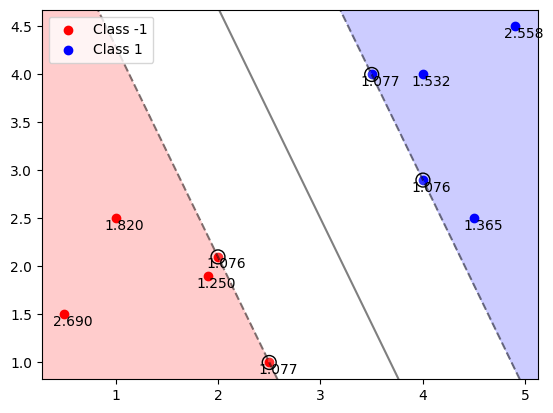

In [5]:
# Plot the data points
fig, ax = plt.subplots()
# X = np.append(X,[test],axis=0)
# y = np.append(y,[result],axis=0)
scatter1 = ax.scatter(np.array(X)[y == -1, 0], np.array(X)[y == -1, 1], c='r', label='Class -1')
scatter2 = ax.scatter(np.array(X)[y == 1, 0], np.array(X)[y == 1, 1], c='b', label='Class 1')

# Plot the hyperplane and margins
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1])
yy = np.linspace(ylim[0], ylim[1])
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = (np.dot(xy, simple_SVM.w) + simple_SVM.b).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.contourf(XX, YY, Z, levels=[-np.inf, -1, 0, 1, np.inf], alpha=0.2,colors=['red', 'white','white', 'blue'])
ax.scatter(simple_SVM.supportVectors[:, 0], simple_SVM.supportVectors[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
for i in range(len(simple_SVM.distances)):
    # if y[i] == 1:
    #     direction = -1
    # else:
    #     direction = 1
    # normal_vector = simple_SVM.w / np.linalg.norm(simple_SVM.w)
    # p0 = X[i]
    # p1 = p0 + direction * simple_SVM.distances[i] * normal_vector
    # ax.plot([p0[0], p1[0]], [p0[1], p1[1]], '--k')
    ax.annotate("{:.3f}".format(simple_SVM.distances[i]), (X[i][0], X[i][1]), textcoords="offset points", xytext=(-8,-8))
plt.legend(handles=[scatter1, scatter2])
plt.show()


As we can see from the graph and output before we have all the Support vectors to be within or on the margin

the new point to which was classified using the SVM [3,3] was classified correctly as class 1

# Neural Network

In [6]:
import gzip
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
train_set, valid_set, test_set = None , None, None 
with gzip.open('./mnist-1.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set  = pickle.load(f, encoding='latin1')

# Check that the datasets are loaded correctly
print("Train set:", train_set)
print("Valid set:", valid_set)
print("Test set:", test_set)

# Access the train_set variable
X_train, y_train = train_set
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_valid, y_valid = valid_set
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)

X_test, y_test = test_set
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Preprocess validation and test data sets
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)



Train set: (array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([5, 0, 4, ..., 8, 4, 8], dtype=int64))
Valid set: (array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([3, 8, 6, ..., 5, 6, 8], dtype=int64))
Test set: (array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([7, 2, 1, ..., 4, 5, 6], dtype=int64))
X_train shape: (50000, 784)
y_train shape: (50000,)
X_valid

In [7]:

# Create an instance of MLPClassifier
from sklearn.neural_network import MLPClassifier
#lets just give some params at random 
mlp_no_tune = MLPClassifier(solver='sgd',alpha=1E-4,activation='logistic',verbose=True)

# this is under the assumption that the validation data which we loaded earlier is not there in the training data and needs to be appended to the end 
# we append validation set to the end of the training set so validation fraction can take it as validation data when we do grid search
X_train= np.concatenate((X_train,X_valid))
y_train= np.concatenate((y_train,y_valid))

# Train the model on the training data
history_no_tune= mlp_no_tune.fit(X_train, y_train)




Iteration 1, loss = 2.24116764
Iteration 2, loss = 2.08609399
Iteration 3, loss = 1.90186788
Iteration 4, loss = 1.68953842
Iteration 5, loss = 1.47663315
Iteration 6, loss = 1.28905086
Iteration 7, loss = 1.13623605
Iteration 8, loss = 1.01563648
Iteration 9, loss = 0.92057984
Iteration 10, loss = 0.84496757
Iteration 11, loss = 0.78379570
Iteration 12, loss = 0.73356253
Iteration 13, loss = 0.69168154
Iteration 14, loss = 0.65631020
Iteration 15, loss = 0.62599858
Iteration 16, loss = 0.59977756
Iteration 17, loss = 0.57689640
Iteration 18, loss = 0.55670823
Iteration 19, loss = 0.53876505
Iteration 20, loss = 0.52276977
Iteration 21, loss = 0.50843287
Iteration 22, loss = 0.49542714
Iteration 23, loss = 0.48369809
Iteration 24, loss = 0.47301259
Iteration 25, loss = 0.46324053
Iteration 26, loss = 0.45428548
Iteration 27, loss = 0.44604852
Iteration 28, loss = 0.43846219
Iteration 29, loss = 0.43142740
Iteration 30, loss = 0.42486635
Iteration 31, loss = 0.41883279
Iteration 32, los

c:\Users\sanje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


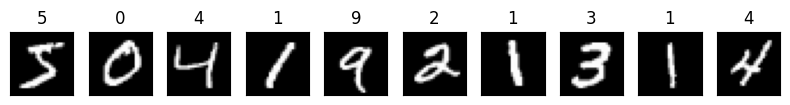

In [8]:
# just wanted to see what the data looks like as an image 
sample_size = 10
images = X_train[:sample_size]
labels = y_train[:sample_size]

# Reshape the images from 1D to 2D arrays
images = images.reshape((-1, 28, 28))

# Plot the images as subplots in a 5x5 grid
fig, axes = plt.subplots(nrows=1, ncols=sample_size, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(images[i], cmap='gray')
    # Set title to the corresponding label
    ax.set_title(str(labels[i]))
    # Remove ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

# Show the plot
plt.tight_layout()
plt.show()

In [9]:

# lets use GriDSearchCV to tune hyper params 
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)]
}

# Create an instance of MLPClassifier
# we also set shuffle false so it will take validation data from the end
mlp = MLPClassifier(alpha=1E-4,solver='sgd',early_stopping=True, shuffle=False, validation_fraction=X_train.shape[0]/(X_valid.shape[0]*100),verbose=True)

# Create an instance of GridSearchCV
grid_search = GridSearchCV(mlp, param_grid,n_jobs=-1)

# Fit the grid search 
grid_search.fit(X_train, y_train)

#run best mlp
mlp_better = grid_search.best_estimator_

# Get the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_mlp = grid_search.best_estimator_

print("Best hyperparameters:", best_params)
print("Best estimator:", best_mlp)


Iteration 1, loss = 1.65080044
Validation score: 0.768889
Iteration 2, loss = 0.72524041
Validation score: 0.855556
Iteration 3, loss = 0.50134430
Validation score: 0.875000
Iteration 4, loss = 0.42309333
Validation score: 0.881111
Iteration 5, loss = 0.38140530
Validation score: 0.886667
Iteration 6, loss = 0.35417625
Validation score: 0.892778
Iteration 7, loss = 0.33422244
Validation score: 0.900278
Iteration 8, loss = 0.31851483
Validation score: 0.902778
Iteration 9, loss = 0.30552243
Validation score: 0.905556
Iteration 10, loss = 0.29438743
Validation score: 0.907500
Iteration 11, loss = 0.28458832
Validation score: 0.909722
Iteration 12, loss = 0.27577307
Validation score: 0.912778
Iteration 13, loss = 0.26768500
Validation score: 0.914444
Iteration 14, loss = 0.26017734
Validation score: 0.916944
Iteration 15, loss = 0.25315341
Validation score: 0.918889
Iteration 16, loss = 0.24655960
Validation score: 0.920278
Iteration 17, loss = 0.24031299
Validation score: 0.922222
Iterat

In [10]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
# Record the loss and accuracy for each epoch
mlp_better=MLPClassifier(alpha=1E-4,solver='sgd',early_stopping=True, shuffle=False, validation_fraction=X_train.shape[0]/(X_valid.shape[0]*100),verbose=True,**best_params)
history_tuned = mlp_better.fit(X_train,y_train)


Iteration 1, loss = 1.68685783
Validation score: 0.783611
Iteration 2, loss = 0.73368881
Validation score: 0.868333
Iteration 3, loss = 0.49744516
Validation score: 0.891667
Iteration 4, loss = 0.41853394
Validation score: 0.900556
Iteration 5, loss = 0.37795463
Validation score: 0.906389
Iteration 6, loss = 0.35167260
Validation score: 0.911667
Iteration 7, loss = 0.33222044
Validation score: 0.917222
Iteration 8, loss = 0.31665793
Validation score: 0.920000
Iteration 9, loss = 0.30356603
Validation score: 0.923611
Iteration 10, loss = 0.29213760
Validation score: 0.927778
Iteration 11, loss = 0.28198739
Validation score: 0.929444
Iteration 12, loss = 0.27282111
Validation score: 0.931389
Iteration 13, loss = 0.26445975
Validation score: 0.933333
Iteration 14, loss = 0.25677622
Validation score: 0.935556
Iteration 15, loss = 0.24965352
Validation score: 0.936111
Iteration 16, loss = 0.24300311
Validation score: 0.936944
Iteration 17, loss = 0.23679711
Validation score: 0.938056
Iterat

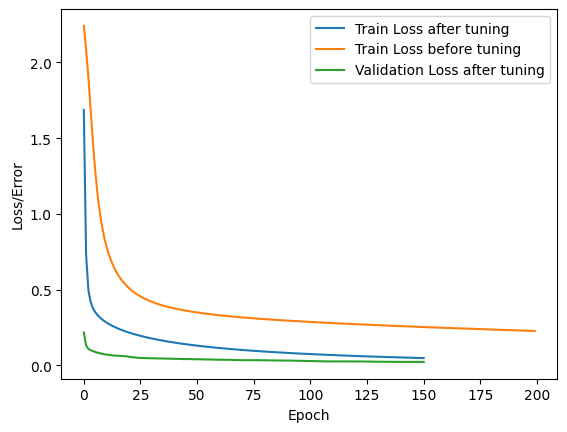

Best hyperparameters: {'hidden_layer_sizes': (100, 50)}
Best estimator: MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), shuffle=False,
              solver='sgd', validation_fraction=0.06, verbose=True)

After Tuning
Best Validation accuracy: 0.9780555555555556
Validation error: 0.021944444444444433
Test accuracy: 0.974
Test Error: 0.026000000000000023
train accuracy: 0.986
train Error: 0.014000000000000012

Before Tuning
Test accuracy: 0.936
Test Error: 0.06399999999999995
train accuracy: 0.936
train Error: 0.06399999999999995


In [12]:
# Get the validation loss curve
valid_loss_tuned = [1- x for x in mlp_better.validation_scores_]

# Plot the loss curves
plt.plot(history_tuned.loss_curve_, label='Train Loss after tuning')
plt.plot(history_no_tune.loss_curve_, label='Train Loss before tuning')
plt.plot(valid_loss_tuned, label='Validation Loss after tuning')
plt.xlabel('Epoch')
plt.ylabel('Loss/Error')
plt.legend()
plt.show()

print("Best hyperparameters:", best_params)
print("Best estimator:", best_mlp)
print()
from sklearn.metrics import accuracy_score
# Evaluate the best estimator
print("After Tuning")
acc_valid_tuned = history_tuned.best_validation_score_
print("Best Validation accuracy:", acc_valid_tuned)
print("Validation error:", 1-acc_valid_tuned)

y_test_pred_tuned = mlp_better.predict(X_test)
acc_test_tuned = round(accuracy_score(y_test,y_test_pred_tuned),3)

y_train_pred_tuned = mlp_better.predict(X_train)
acc_train_tuned = round(accuracy_score(y_train,y_train_pred_tuned),3)

print("Test accuracy:", acc_test_tuned)
print("Test Error:", 1-acc_test_tuned)

print("train accuracy:", acc_train_tuned)
print("train Error:", 1-acc_train_tuned)

print()
# Evaluate the best estimator
print("Before Tuning")
y_test_pred_no_tune = mlp_no_tune.predict(X_test)
acc_test_no_tune = round(accuracy_score(y_test,y_test_pred_no_tune),3)

y_train_pred_no_tune = mlp_no_tune.predict(X_train)
acc_train_no_tune = round(accuracy_score(y_train,y_train_pred_no_tune),3)

print("Test accuracy:", acc_test_no_tune)
print("Test Error:", 1-acc_test_no_tune)

print("train accuracy:", acc_train_no_tune)
print("train Error:", 1-acc_train_no_tune)


Based on the above results we can clearly see an improvement of the model from an initial accuracy score of ~0.93 to ~0.97 on the test data after the hyperparam meters were tuned using grid search 

the best params that were found were : {'hidden_layer_sizes': (100, 50)} using solver='sgd' and alpha=1E-4

the training loss curve also shows us that tuned model's training process was stopped at iteration 151 due to the validation score not improving more than a certain tolerance value for 10 consecutive epochs.
This means that the model's performance was not improving despite further iterations of the training process, and hence the training was terminated.
this termination condition was determined by the validation score on the validation set which ensure the model doesnt overfit giving the optimal params for the MLPClassifier

whereas for the model with no tuning the training process doesnt terminate despite the fact the change in loss was insignificant and proceeds to try and optimize the model further ( till the 200th iteration)

The tuned model could further be tuned and made better with a GPU based library for neural networks like keras and pytorch which could allow a deeper neural network to be created along with exploration of different solvers, activation functions and a wider range of alpha values to further improve the MLP Classification model  